# Make GWP figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 90 and 50 Tg/y

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

## Hydrogen GWP
We read in and plot the GWP values of hydrogen through changes in methane lifetime, changes in ozone concentration both directly from hydrogen reactions and indirectly from methane changes, and changes in stratospheric water vapour, also both from direct production from hydrogen and induced via changes in methane concentrations. Bar plots show how the various contributions contribute to the total GWP value in each of the models.

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_legend= mpatches.Patch( facecolor=O3_color, label='O3')
H2O_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')


model_dict = { 'GFDL_nudge':'GFDL',
               'OSLOCTM3':'OsloCTM',
               'INCA':'INCA',
               'UKCA':'UKCA',
               'WACCM6-2deg':'WACCM',
               'GFDL-emi':'GFDL-emi',
               'OSLOCTM3-emi':'OsloCTM-emi'
             }

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

In [4]:
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp

,GFDL-emi,GFDL,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM
O3,4.34,2.34,1.64,2.44,2.49,1.19,1.97
strat H2O,2.93,1.80,1.27,1.94,1.97,nan,0.58
O3 CH4ind,nan,2.24,1.47,2.73,2.80,1.47,3.00
strat H2O CH4ind,nan,1.34,0.44,0.67,0.69,nan,0.27
CH4dir,4.95,4.44,4.45,4.09,5.47,3.45,4.05
CH4indir,nan,0.96,0.89,1.26,nan,1.15,1.59


In [5]:
df_drydep_best_table_gwp = pd.read_csv(filepath+'drydep_53_table_h2_gwp.csv',index_col=0)
df_drydep_best_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep_best_table_gwp


,GFDL-emi,GFDL,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM
O3,4.44,2.46,1.62,2.64,2.66,1.74,2.46
strat H2O,3.00,1.89,1.26,2.10,2.11,nan,0.72
O3 CH4ind,nan,2.35,1.45,2.96,2.99,2.15,3.76
strat H2O CH4ind,nan,1.41,0.43,0.73,0.73,nan,0.33
CH4dir,5.06,4.65,4.39,4.43,5.84,5.04,5.07
CH4indir,nan,1.01,0.88,1.36,nan,1.67,1.99


In [6]:
total_drydep_best = df_drydep_best_table_gwp.sum()
total_drydep_best

GFDL-emi      12.5
GFDL          13.8
INCA          10.0
OsloCTM       14.2
OsloCTM-emi   14.3
UKCA          10.6
WACCM         14.3
dtype: float64

In [7]:
#Sort indexes
df_table_gwp = df_table_gwp.reindex(['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind'])

df_table_gwp = df_table_gwp[sorted_array]
df_table_gwp

,GFDL,OsloCTM,INCA,UKCA,WACCM,GFDL-emi,OsloCTM-emi
CH4dir,4.44,4.09,4.45,3.45,4.05,4.95,5.47
CH4indir,0.96,1.26,0.89,1.15,1.59,nan,nan
O3,2.34,2.44,1.64,1.19,1.97,4.34,2.49
O3 CH4ind,2.24,2.73,1.47,1.47,3.00,nan,2.80
strat H2O,1.80,1.94,1.27,nan,0.58,2.93,1.97
strat H2O CH4ind,1.34,0.67,0.44,nan,0.27,nan,0.69


In [8]:
df_table_gwp_simple = df_table_gwp.fillna(0.0)
df_table_gwp_simple.loc['CH4'] = df_table_gwp_simple.loc['CH4dir']+df_table_gwp_simple.loc['CH4indir']
df_table_gwp_simple.loc['O3'] = df_table_gwp_simple.loc['O3 CH4ind']+df_table_gwp_simple.loc['O3']
df_table_gwp_simple.loc['strat H2O'] = df_table_gwp_simple.loc['strat H2O']+df_table_gwp_simple.loc['strat H2O CH4ind']


df_table_gwp_simple.replace(0, np.nan, inplace=True)
df_table_gwp_simple = df_table_gwp_simple.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])
df_table_gwp_simple


,GFDL,OsloCTM,INCA,UKCA,WACCM,GFDL-emi,OsloCTM-emi
O3,4.58,5.17,3.11,2.66,4.97,4.34,5.28
strat H2O,3.14,2.61,1.72,nan,0.84,2.93,2.66
CH4,5.40,5.35,5.34,4.60,5.64,4.95,5.47


In [9]:
#Best estimate, resetting all models with the same drydep values.

df_table_gwp_best_estimate = df_drydep_best_table_gwp.fillna(0.0)
df_table_gwp_best_estimate.loc['CH4'] = df_table_gwp_best_estimate.loc['CH4dir']+df_table_gwp_best_estimate.loc['CH4indir']
df_table_gwp_best_estimate.loc['O3'] = df_table_gwp_best_estimate.loc['O3 CH4ind']+df_table_gwp_best_estimate.loc['O3']
df_table_gwp_best_estimate.loc['strat H2O'] = df_table_gwp_best_estimate.loc['strat H2O']+df_table_gwp_best_estimate.loc['strat H2O CH4ind']


df_table_gwp_best_estimate = df_table_gwp_best_estimate.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])
df_table_gwp_best_estimate.loc['Total'] = df_table_gwp_best_estimate.sum()
df_table_gwp_best_estimate.replace(0, np.nan, inplace=True)
df_table_gwp_best_estimate['Model mean'] = df_table_gwp_best_estimate.mean(axis=1)

df_table_gwp_best_estimate

,GFDL-emi,GFDL,INCA,OsloCTM,OsloCTM-emi,UKCA,WACCM,Model mean
O3,4.44,4.81,3.06,5.60,5.64,3.88,6.23,4.81
strat H2O,3.00,3.30,1.69,2.83,2.84,nan,1.05,2.45
CH4,5.06,5.66,5.27,5.79,5.84,6.71,7.06,5.91
Total,12.5,13.8,10.0,14.2,14.3,10.6,14.3,12.8


In [10]:
#GWP table to manuscript:
#Reread:
df_table_gwp_model_mean = df_table_gwp.fillna(0.0)

df_gwp_table_to_manuscript = pd.DataFrame(columns=['CH4','O3','O3 CH4ind [%]','Strat H2O','Strat H2O CH4ind [%]'], index=sorted_array)
df_gwp_table_to_manuscript['CH4'] = df_table_gwp_model_mean.loc['CH4dir']+df_table_gwp_model_mean.loc['CH4indir']
df_gwp_table_to_manuscript['O3'] = df_table_gwp_model_mean.loc['O3 CH4ind']+df_table_gwp_model_mean.loc['O3']
df_gwp_table_to_manuscript['Strat H2O'] = df_table_gwp_model_mean.loc['strat H2O']+df_table_gwp_model_mean.loc['strat H2O CH4ind']
df_gwp_table_to_manuscript['O3 CH4ind [%]'] = df_table_gwp_model_mean.loc['O3 CH4ind']/df_gwp_table_to_manuscript['O3']*100.0
df_gwp_table_to_manuscript['Strat H2O CH4ind [%]'] = df_table_gwp_model_mean.loc['strat H2O CH4ind']/df_gwp_table_to_manuscript['Strat H2O']*100.0


df_gwp_table_to_manuscript.replace(0,np.nan, inplace=True)
df_gwp_table_to_manuscript.loc['Model mean'] = df_gwp_table_to_manuscript.mean()
total=df_gwp_table_to_manuscript[['CH4','O3','Strat H2O']].loc['Model mean'].sum()
df_gwp_table_to_manuscript['Total'] = total


df_gwp_table_to_manuscript.loc['Best estimate'] = df_gwp_table_to_manuscript.loc['Model mean']*np.nan
df_gwp_table_to_manuscript['CH4'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['CH4']
df_gwp_table_to_manuscript['O3'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['O3']
df_gwp_table_to_manuscript['Strat H2O'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['strat H2O']
df_gwp_table_to_manuscript['Total'].loc['Best estimate'] =df_table_gwp_best_estimate['Model mean'].loc['Total']
df_gwp_table_to_manuscript

,CH4,O3,O3 CH4ind [%],Strat H2O,Strat H2O CH4ind [%],Total
GFDL,5.40,4.58,48.9,3.14,42.7,11.9
OsloCTM,5.35,5.17,52.8,2.61,25.8,11.9
INCA,5.34,3.11,47.2,1.72,25.7,11.9
UKCA,4.60,2.66,55.3,nan,nan,11.9
WACCM,5.64,4.97,60.4,0.84,31.5,11.9
GFDL-emi,4.95,4.34,nan,2.93,nan,11.9
OsloCTM-emi,5.47,5.28,52.9,2.66,25.9,11.9
Model mean,5.25,4.30,52.9,2.32,30.3,11.9
Best estimate,5.91,4.81,nan,2.45,nan,12.8


In [11]:
df_table_gwp_simple=df_table_gwp_simple.sort_index()
df_table_gwp_simple

,GFDL,OsloCTM,INCA,UKCA,WACCM,GFDL-emi,OsloCTM-emi
CH4,5.40,5.35,5.34,4.60,5.64,4.95,5.47
O3,4.58,5.17,3.11,2.66,4.97,4.34,5.28
strat H2O,3.14,2.61,1.72,nan,0.84,2.93,2.66


O3          4.81
strat H2O   2.45
CH4         5.91
Total       12.8
Name: Model mean, dtype: float64


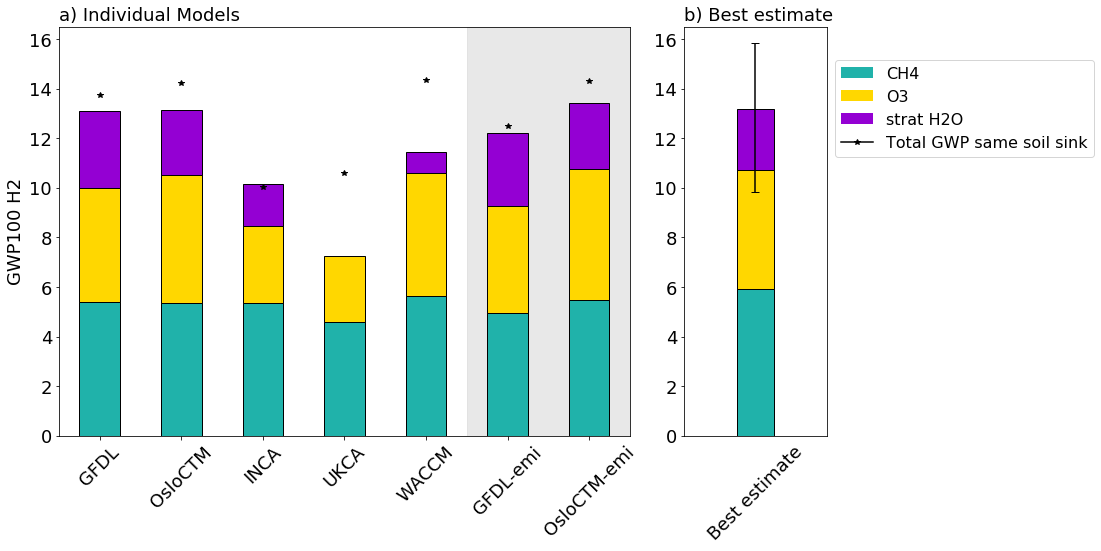

In [12]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15,8),sharey=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
axs = plt.subplot(gs[0])


df_table_gwp_simple.T.plot.bar(stacked=True,
                        color=[CH4_color,O3_color, H2O_color],
                        edgecolor='black',
                        ax=axs, 
                        legend = False) 

for m,model in enumerate(df_table_gwp_simple.columns):
        star,=axs.plot(m,df_table_gwp_best_estimate[model].loc['Total'],color='black',marker='*',linestyle=None,label='Total GWP same soil sink')
   
#    axs.plot(m,total_drydep_max.loc[model],#

    
#    axs.plot(m,total_drydep_min.loc[model],marker='v',color='black')
#    axs.plot([m,m],[total_drydep_min.loc[model],total_drydep_max.loc[model]],color='black')


axs.axvspan(4.5, 7, alpha=0.5, color='lightgray',zorder=-10)
axs.set_title('a) Individual Models',loc='left')
#bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
#i = 0
#
#for b,bar in enumerate(bars):    
#    for p,patch in enumerate(bar):
#        if b == 1 : 
#            patch.set_hatch('\\')
#        if b == 3 : 
#            patch.set_hatch('\\')
#        if b == 5 : 
#            patch.set_hatch('\\')
#        i = i + 1



axs.set_ylabel('GWP100 H2')
plt.ylim((0,16.5))
plt.xticks(rotation = 45)
#axs.set_xticks(rotation=25, horizontalalignment="center")

axs = plt.subplot(gs[1])
x = ['', 'Best estimate', ' ']
y1 = [0,df_table_gwp_best_estimate['Model mean']['CH4'],0]
y2 = [0,df_table_gwp_best_estimate['Model mean']['O3'],0]
helpy = [0,df_table_gwp_best_estimate['Model mean']['CH4']+df_table_gwp_best_estimate['Model mean']['O3'],0]
y3 = [0,df_table_gwp_best_estimate['Model mean']['strat H2O'],0]
print(df_table_gwp_best_estimate['Model mean'])
plt.bar(x, y1,color=CH4_color, width = 0.8, edgecolor='black', )
plt.bar(x, y2,color=O3_color, bottom = y1, width = 0.8, edgecolor='black')
plt.bar(x, y3,color=H2O_color, bottom = helpy, width = 0.8, edgecolor='black')


plt.errorbar(1, df_table_gwp_best_estimate['Model mean'].loc['Total'], yerr=3, color='black',capsize=4)
#df_table_gwp_best_estimate['Model mean'].drop('Total').T.plot.bar(stacked=True,
#                        color=[CH4_color,O3_color,  H2O_color],
#                        edgecolor='black',
#                        ax=axs, legend=False) 
plt.ylim((0,16.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 
#plt.xlim((0.4,0.6))
# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_legend,  H2O_legend, star])   
axs.set_title('b) Best estimate',loc='left')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP.png', transparent=True)



## Methane GWP
The same exercise is repeated for methane GWP, including also feedbacks through hydrogen. Here we include the AR6 values for methane GWP for comparison.

In [13]:
df_drydep_max_table_gwp = pd.read_csv(filepath+'drydep_90_table_ch4_gwp.csv',index_col=0)
df_drydep_max_table_gwp.rename(columns=model_dict, inplace=True)
df_drydep_min_table_gwp = pd.read_csv(filepath+'drydep_50_table_ch4_gwp.csv',index_col=0)
df_drydep_min_table_gwp.rename(columns=model_dict, inplace=True)
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)
df_table_gwp.rename(columns=model_dict, inplace=True)

total_drydep_max = df_drydep_max_table_gwp.sum()

total_drydep_min = df_drydep_min_table_gwp.sum()


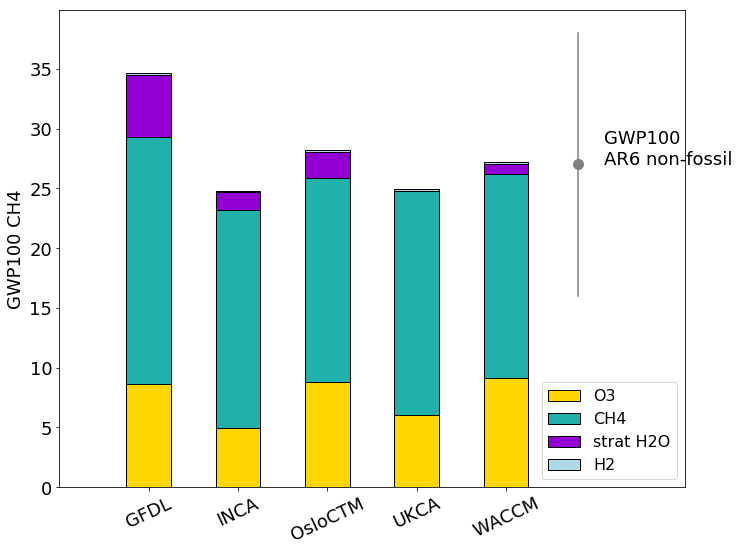

In [14]:
df_table_gwp = df_table_gwp.drop(['OsloCTM-emi'],axis=1)

fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[O3_color, CH4_color, H2O_color, H2_color],
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 
#It is the non-fossil GWP that is relevant to compare to.
#axs.plot([4.8,4.8],[29.8-11 ,29.8+11 ],color='black')
#axs.text(4.4,29.8,'GWP100 \nAR6 fossil')
axs.plot([4.8,4.8],[27.0-11 ,27.0+11 ],color='gray')
axs.plot(4.8,27.0,'o',markersize=10,color='gray')
axs.text(5.1,27.0,'GWP100 \nAR6 non-fossil')

plt.xlim([-1,6])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    
plt.savefig('output/CH4_GWP.png', transparent=True)